In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('default')
import numpy as np
import time
from datetime import datetime
import os
import csv


In [2]:
city_data = os.path.join("weather_data", "cities.csv")

# Read the City and Ride Data
city_data_i = pd.read_csv(city_data, sep=",")

In [3]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data_i)
#city_data_df.head(10)

In [4]:
new_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp','Humidity',	'Cloudiness', 'Wind Speed' ]
city_data_df = city_data_df[new_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tuktoyaktuk,CA,2022-03-14 04:27:03,69.4541,-133.0374,-9.40,77,40,12.66
1,Rikitea,PF,2022-03-14 04:27:04,-23.1203,-134.9692,80.49,71,70,14.36
2,Kodiak,US,2022-03-14 04:27:04,57.7900,-152.4072,38.71,81,100,16.11
3,Bethel,US,2022-03-14 04:22:34,41.3712,-73.4140,29.93,72,100,0.00
4,Lagoa,PT,2022-03-14 04:27:05,39.0500,-27.9833,55.11,62,82,8.12
5,East London,ZA,2022-03-14 04:27:06,-33.0153,27.9116,63.54,88,75,20.71
6,Georgetown,MY,2022-03-14 04:26:00,5.4112,100.3354,87.73,77,20,4.61
7,Khatanga,RU,2022-03-14 04:27:06,71.9667,102.5000,-1.46,94,100,11.52
8,Cape Town,ZA,2022-03-14 04:24:03,-33.9258,18.4232,57.61,66,20,8.05
9,Kalna,IN,2022-03-14 04:27:07,23.2167,88.3667,88.11,21,27,6.71


In [5]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [6]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

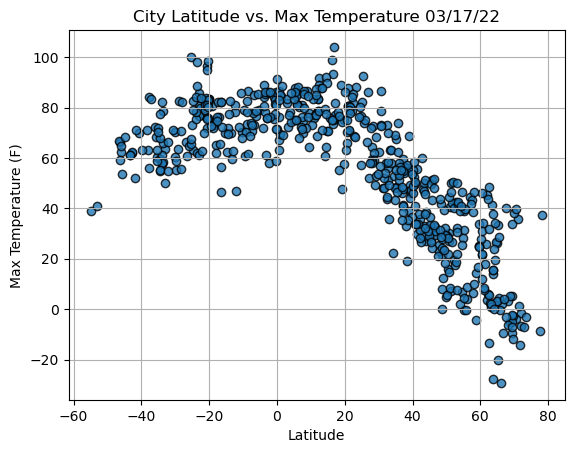

In [7]:
# Import time module
import time
plt.style.use('default')

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

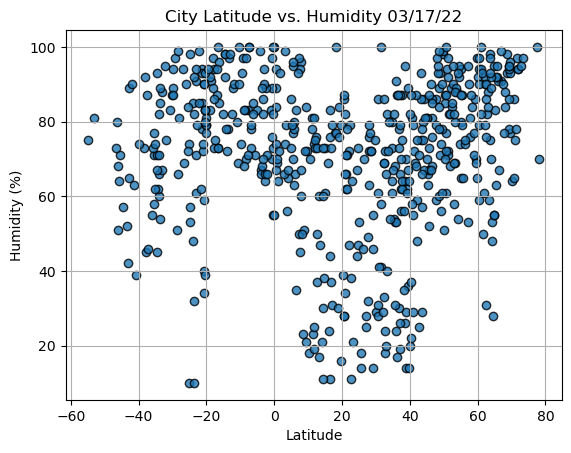

In [8]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

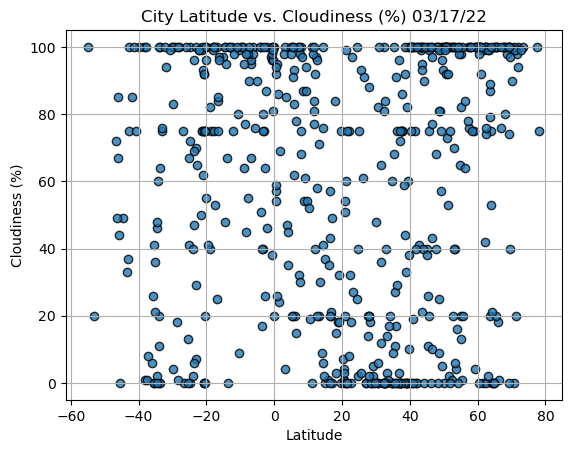

In [9]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

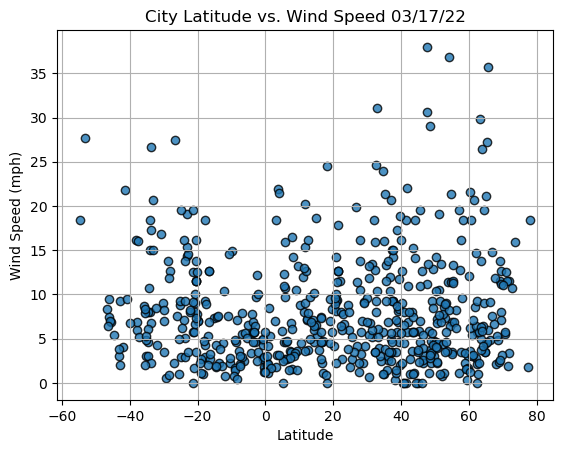

In [10]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [11]:
from scipy.stats import linregress
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

# Perform linear regression.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    lin_reg_lst = (slope, intercept, r_value, p_value, std_err)
    lin_reg_df = pd.DataFrame({"Slope":slope,
                               "Intercept":intercept,
                               "r Value":r_value,
                               "p Value":p_value,
                               "Std Error":std_err}, index=[0])
    print(lin_reg_df)
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept

    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create a scatter plot of the x and y values.
    plt.scatter(x_values,y_values)
    # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation and add its coordinates.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel('Temp')
    plt.tight_layout()
    plt.show()

In [12]:
#lin_reg_df

In [13]:
index13 = city_data_df.loc[13]

In [14]:
index13

City                       Agadez
Country                        NE
Date          2022-03-14 04:27:09
Lat                         19.75
Lng                         10.25
Max Temp                    57.49
Humidity                       16
Cloudiness                      0
Wind Speed                   8.32
Name: 13, dtype: object

In [15]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [16]:
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tuktoyaktuk,CA,2022-03-14 04:27:03,69.4541,-133.0374,-9.40,77,40,12.66
2,Kodiak,US,2022-03-14 04:27:04,57.7900,-152.4072,38.71,81,100,16.11
3,Bethel,US,2022-03-14 04:22:34,41.3712,-73.4140,29.93,72,100,0.00
4,Lagoa,PT,2022-03-14 04:27:05,39.0500,-27.9833,55.11,62,82,8.12
6,Georgetown,MY,2022-03-14 04:26:00,5.4112,100.3354,87.73,77,20,4.61


      Slope  Intercept  r Value        p Value  Std Error
0 -1.232323  93.751377  -0.8751  1.610836e-127    0.03416


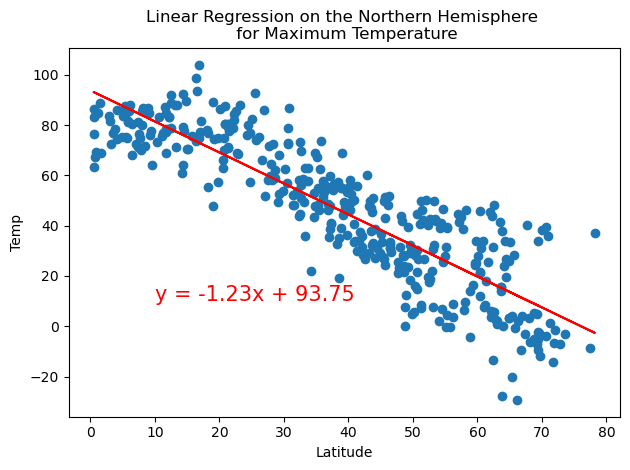

<Figure size 640x480 with 0 Axes>

In [17]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,10))
plt.savefig('weather_data/Fig5.png')

      Slope  Intercept   r Value       p Value  Std Error
0  0.387948  80.611838  0.456616  1.492621e-10   0.056976


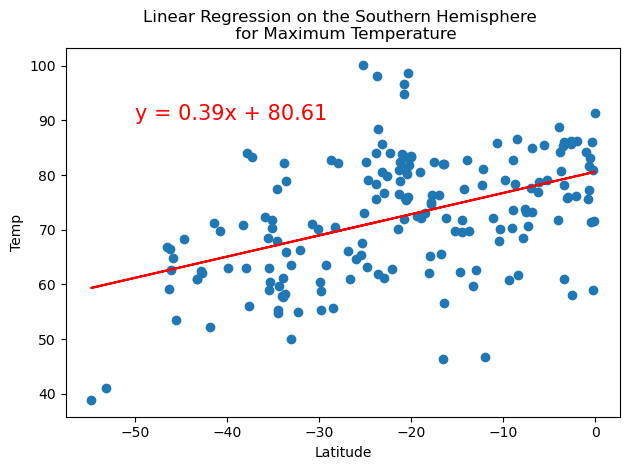

<Figure size 640x480 with 0 Axes>

In [18]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))
plt.savefig('weather_data/Fig6.png')

      Slope  Intercept   r Value       p Value  Std Error
0  0.387948  80.611838  0.456616  1.492621e-10   0.056976


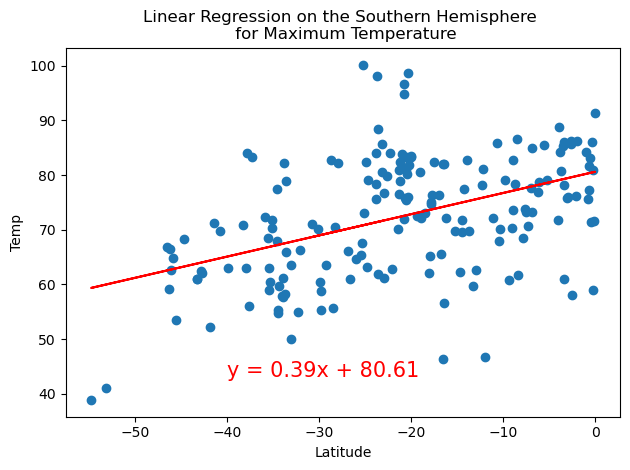

<Figure size 640x480 with 0 Axes>

In [19]:
# Create Southern Hemisphere Chart
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
                       "Linear Regression on the Southern Hemisphere \n for Maximum Temperature",
                       "Max Temperature (F)", (-40,43))
plt.savefig('weather_data/Fig6.png')

      Slope  Intercept   r Value       p Value  Std Error
0  0.382595  53.831541  0.339881  2.841012e-12   0.053066


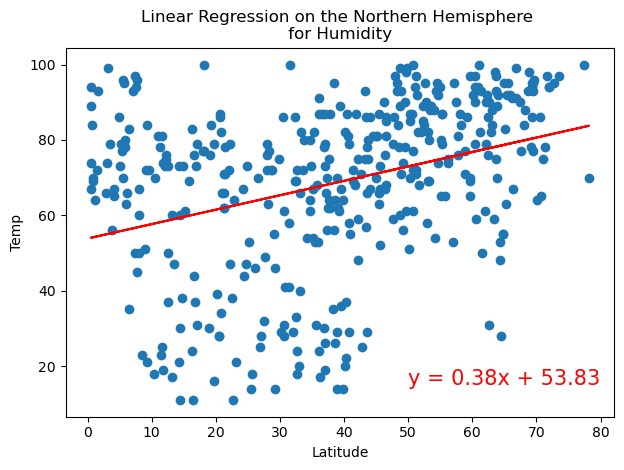

<Figure size 640x480 with 0 Axes>

In [20]:
# Create Northern Hemisphere Chart
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
                       "Linear Regression on the Northern Hemisphere \n for Humidity ",
                       "Humidity (%)", (50,15))
plt.savefig('weather_data/Fig7.png')

      Slope  Intercept   r Value   p Value  Std Error
0  0.343501  84.319371  0.268399  0.000292    0.09293


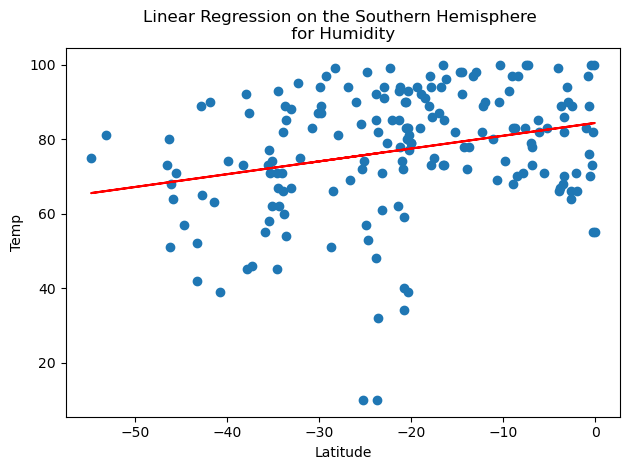

<Figure size 640x480 with 0 Axes>

In [21]:
# Create Southern Hemisphere Chart
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
                       "Linear Regression on the Southern Hemisphere \n for Humidity ",
                       "Humidity (%)", (-30,5))
plt.savefig('weather_data/Fig8.png')

      Slope  Intercept   r Value   p Value  Std Error
0  0.420848  39.919956  0.208978  0.000025   0.098716


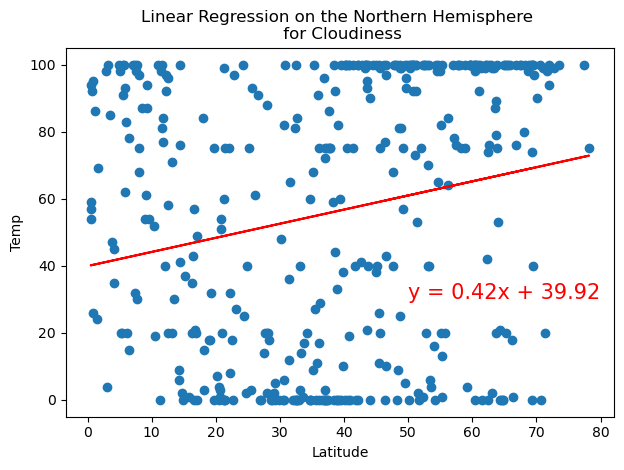

<Figure size 640x480 with 0 Axes>

In [22]:
# Create Northern Hemisphere Chart
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
                       "Linear Regression on the Northern Hemisphere \n for Cloudiness",
                       "Cloudiness (%)", (50,30))
plt.savefig('weather_data/Fig9.png')

      Slope  Intercept   r Value  p Value  Std Error
0  0.793714  83.026851  0.296173  0.00006   0.192942


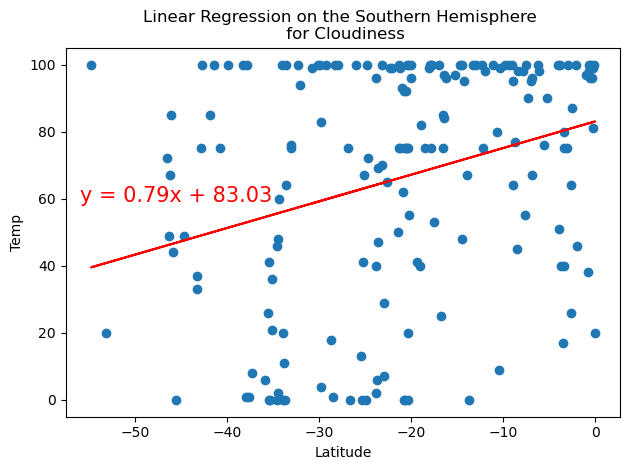

<Figure size 640x480 with 0 Axes>

In [23]:
# Create Southern Hemisphere Chart
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
                       "Linear Regression on the Southern Hemisphere \n for Cloudiness",
                       "Cloudiness (%)", (-56,59))
plt.savefig('weather_data/Fig10.png')

      Slope  Intercept   r Value  p Value  Std Error
0  0.026062   7.042087  0.080912  0.10613   0.016092


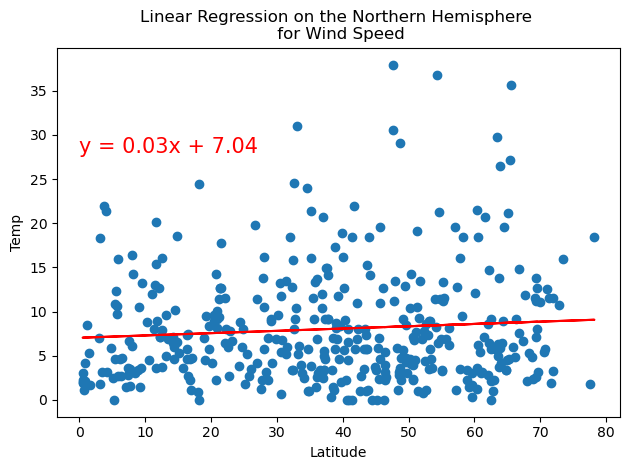

<Figure size 640x480 with 0 Axes>

In [24]:
# Create Northern Hemisphere Chart
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
                       "Linear Regression on the Northern Hemisphere \n for Wind Speed",
                       "Wind Speed (mph)", (0,28))
plt.savefig('weather_data/Fig11.png')

      Slope  Intercept   r Value   p Value  Std Error
0 -0.143628   4.428156 -0.344112  0.000003    0.02954


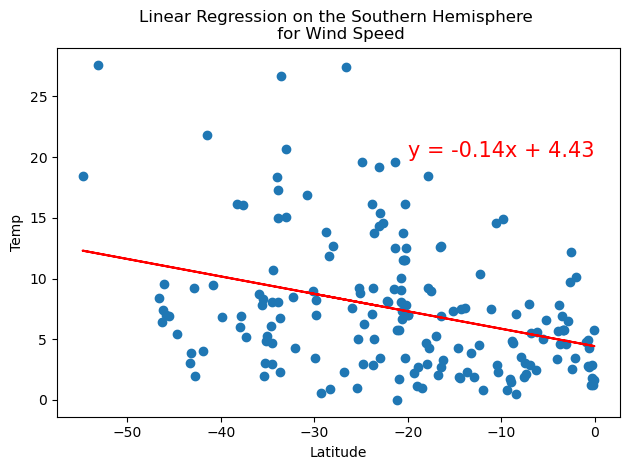

<Figure size 640x480 with 0 Axes>

In [25]:
# Create Southern Hemisphere Chart
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
                       "Linear Regression on the Southern Hemisphere \n for Wind Speed",
                       "Wind Speed (mph)", (-20,20))
plt.savefig('weather_data/Fig12.png')

In [27]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [28]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Rikitea,PF,2022-03-14 04:27:04,-23.1203,-134.9692,80.49,71,70,14.36
6,Georgetown,MY,2022-03-14 04:26:00,5.4112,100.3354,87.73,77,20,4.61
9,Kalna,IN,2022-03-14 04:27:07,23.2167,88.3667,88.11,21,27,6.71
12,Butaritari,KI,2022-03-14 04:27:08,3.0707,172.7902,81.68,74,4,18.39
15,Avarua,CK,2022-03-14 04:27:10,-21.2078,-159.7750,82.45,78,99,5.75
16,Touros,BR,2022-03-14 04:27:10,-5.1989,-35.4608,79.11,83,90,6.55
18,Esperance,AU,2022-03-14 04:27:12,-33.8667,121.9000,82.24,60,11,17.31
22,Bengkulu,ID,2022-03-14 04:27:13,-3.8004,102.2655,84.31,67,100,7.78
27,Muisne,EC,2022-03-14 04:27:16,0.6000,-80.0333,76.33,89,57,1.92
30,Uribia,CO,2022-03-14 04:27:17,11.7139,-72.2660,78.28,74,84,15.41


In [29]:
preferred_cities_df.notnull().sum()

City          155
Country       155
Date          155
Lat           155
Lng           155
Max Temp      155
Humidity      155
Cloudiness    155
Wind Speed    155
dtype: int64

In [30]:
preferred_cities_df.count()

City          155
Country       155
Date          155
Lat           155
Lng           155
Max Temp      155
Humidity      155
Cloudiness    155
Wind Speed    155
dtype: int64

In [31]:

preferred_cities_df.isnull().sum()

City          0
Country       0
Date          0
Lat           0
Lng           0
Max Temp      0
Humidity      0
Cloudiness    0
Wind Speed    0
dtype: int64

In [34]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
1,Rikitea,PF,80.49,-23.1203,-134.9692,
6,Georgetown,MY,87.73,5.4112,100.3354,
9,Kalna,IN,88.11,23.2167,88.3667,
12,Butaritari,KI,81.68,3.0707,172.7902,
15,Avarua,CK,82.45,-21.2078,-159.7750,
16,Touros,BR,79.11,-5.1989,-35.4608,
18,Esperance,AU,82.24,-33.8667,121.9000,
22,Bengkulu,ID,84.31,-3.8004,102.2655,
27,Muisne,EC,76.33,0.6000,-80.0333,
30,Uribia,CO,78.28,11.7139,-72.2660,


In [ ]:
# Dependencies and Setup
import requests
import gmaps

# Import the API key.
from config import Google_API_KEY

# Set parameters to search for a hotel.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": Google_API_KEY
}